# Exploratory Data Analysis
## Used Dataset : Prosper Loan Data

> I'm going to use Prospe Loan Data as it could provide nice insight in the loan industry  
The dataset consists of 81 columns "attributes" and 113937 rows , thus I'm going 10 to 15 columns to do my analysis on

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df_shape = df.shape
column_names = df.columns

print(f"The dataframe has {df_shape[0]} rows and {df_shape[1]} columns.")

The dataframe has 113937 rows and 81 columns.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
cols = ["ListingCreationDate"
        ,"CreditGrade"
        ,"Term"
        ,"LoanStatus"
        ,"BorrowerAPR"
        ,"BorrowerRate"
        ,"ProsperScore"
        ,"ListingCategory (numeric)"
        ,"Occupation"
       , "EmploymentStatus"
       ,"EmploymentStatusDuration"
       ,"DebtToIncomeRatio"
       ,"IncomeRange"
       ,"IncomeVerifiable"
       ,"StatedMonthlyIncome"
        ,"MonthlyLoanPayment"
        ,"Recommendations"
        ,"Investors"]

In [6]:
df_loan = df[cols]
df_loan["ListingCreationDate"] = df_loan["ListingCreationDate"].apply(np.datetime64)
df_loan.head()

,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,Investors
0,2007-08-26 19:09:29.263,C,36,Completed,0.16516,0.1580,NaN,0,Other,Self-employed,2.0,0.17,"$25,000-49,999",True,3083.333333,330.43,0,258
1,2014-02-27 08:28:07.900,NaN,36,Current,0.12016,0.0920,7.0,2,Professional,Employed,44.0,0.18,"$50,000-74,999",True,6125.000000,318.93,0,1
2,2007-01-05 15:00:47.090,HR,36,Completed,0.28269,0.2750,NaN,0,Other,Not available,NaN,0.06,Not displayed,True,2083.333333,123.32,0,41
3,2012-10-22 11:02:35.010,NaN,36,Current,0.12528,0.0974,9.0,16,Skilled Labor,Employed,113.0,0.15,"$25,000-49,999",True,2875.000000,321.45,0,158
4,2013-09-14 18:38:39.097,NaN,36,Current,0.24614,0.2085,4.0,2,Executive,Employed,44.0,0.26,"$100,000+",True,9583.333333,563.97,0,20


In [7]:
CreditGrades = df_loan["CreditGrade"].unique()
CreditGrade_counts = df_loan["CreditGrade"].value_counts()


In [8]:
LoanStatus_values = df_loan["LoanStatus"].unique()
LoanStatus_counts = df_loan["LoanStatus"].value_counts()


In [9]:
Occupations = df_loan["Occupation"].unique()
Occupations_counts = df_loan["Occupation"].value_counts()


In [10]:
EmploymentStatus_values = df_loan["EmploymentStatus"].unique()
EmploymentStatus_counts = df_loan["EmploymentStatus"].value_counts()


In [11]:
IncomeRanges =df_loan["IncomeRange"].unique()
IncomeRanges_counts = df_loan["IncomeRange"].value_counts()


In [12]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingCreationDate        113937 non-null  datetime64[ns]
 1   CreditGrade                28953 non-null   object        
 2   Term                       113937 non-null  int64         
 3   LoanStatus                 113937 non-null  object        
 4   BorrowerAPR                113912 non-null  float64       
 5   BorrowerRate               113937 non-null  float64       
 6   ProsperScore               84853 non-null   float64       
 7   ListingCategory (numeric)  113937 non-null  int64         
 8   Occupation                 110349 non-null  object        
 9   EmploymentStatus           111682 non-null  object        
 10  EmploymentStatusDuration   106312 non-null  float64       
 11  DebtToIncomeRatio          105383 non-null  float64 

In [13]:
df_loan.describe()

,Term,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,Investors
count,113937.000000,113912.000000,113937.000000,84853.000000,113937.000000,106312.000000,105383.000000,1.139370e+05,113937.000000,113937.000000,113937.000000
mean,40.830248,0.218828,0.192764,5.950067,2.774209,96.071582,0.275947,5.608026e+03,272.475783,0.048027,80.475228
std,10.436212,0.080364,0.074818,2.376501,3.996797,94.480605,0.551759,7.478497e+03,192.697812,0.332353,103.239020
min,12.000000,0.006530,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,36.000000,0.156290,0.134000,4.000000,1.000000,26.000000,0.140000,3.200333e+03,131.620000,0.000000,2.000000
50%,36.000000,0.209760,0.184000,6.000000,1.000000,67.000000,0.220000,4.666667e+03,217.740000,0.000000,44.000000
75%,36.000000,0.283810,0.250000,8.000000,3.000000,137.000000,0.320000,6.825000e+03,371.580000,0.000000,115.000000
max,60.000000,0.512290,0.497500,11.000000,20.000000,755.000000,10.010000,1.750003e+06,2251.510000,39.000000,1189.000000


In [14]:
ListingCategory = {0:"Not Available"
                   ,1:"Debt Consolidation"
                   ,2:"Home Improvement"
                   ,3:"Business"
                   ,4:"Personal Loan"
                   ,5:"Student Use"
                   ,6:"Auto"
                   ,7:"Other"
                   ,8:"Baby & Adoption"
                   ,9:"Boat"
                   ,10:"Cosmetic Procedure"
                   ,11:"Engagement Ring"
                   ,12:"Green Loans"
                   ,13:"Household Expenses"
                   ,14:"Large Purchases"
                   ,15:"Medical/Dental"
                   ,16:"Motorcycle"
                   ,17:"RV"
                   ,18:"Taxes"
                   ,19:"Vacation"
                   ,20:"Wedding Loans"}

In [15]:
categorical_columns = ["ListingCategory (numeric)",
                       "CreditGrade",
                       "LoanStatus",
                       "Occupation",
                       "EmploymentStatus",
                       "IncomeRange",
                       "IncomeVerifiable",
                       "ProsperScore"]
df_loan_categorical = df_loan[categorical_columns]

In [16]:
def vertical_bar_chart(dataframe,_y,_order,_xlabel,_ylabel,_title,_figsize):
    plt.figure(figsize = _figsize)
    plt.title(_title)
    plt.xlabel(_xlabel)
    plt.ylabel(_ylabel)
    sb.countplot(data = dataframe,y = _y , order = _order,color = sb.color_palette()[0])



In [17]:
    def horizontal_bar_chart(dataframe,_x,_order,_xlabel,_ylabel,_title,_figsize):
        plt.figure(figsize = _figsize)
        plt.title(_title)
        plt.xlabel(_xlabel)
        plt.ylabel(_ylabel)
        sb.countplot(data = dataframe,x = _x , order = _order,color = sb.color_palette()[0])


# What is the Status of Loans ?

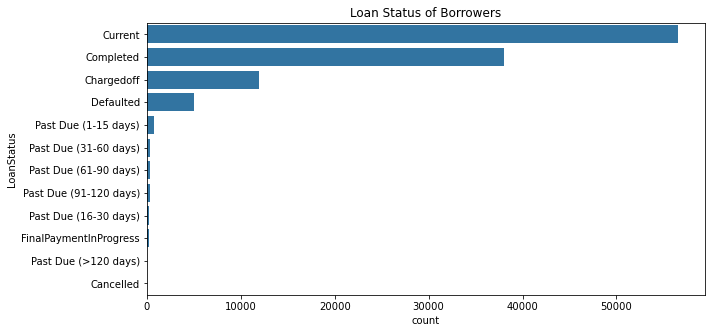

In [18]:
#plt.figure(figsize = [10,5])
#plt.title("Loan Status for Borrowers")
#plt.ylabel("Loan Status")
#plt.xlabel("Number of Borrowers")
#sb.countplot(data = df_loan_categorical,y = 'LoanStatus',order = df_loan_categorical['LoanStatus'].value_counts().index,color = sb.color_palette()[0])
vertical_bar_chart(df_loan_categorical,
                   'LoanStatus',
                   df_loan_categorical['LoanStatus'].value_counts().index,
                   "Number of Borrowers",
                   "Loan Status" ,
                   "Loan Status of Borrowers",
                   [10,5])

> Most loans seem to be either current or completed

# Are loan takers employed , and what kind is most dominant ?


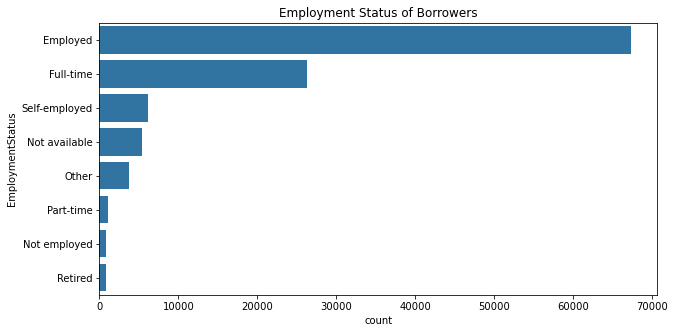

In [19]:
#plt.figure(figsize = [10,5])
#plt.title("Employment Status for Borrowers")
#sb.countplot(data = df_loan_categorical,y = 'EmploymentStatus',order = df_loan_categorical['EmploymentStatus'].value_counts().index,color = sb.color_palette()[0])
vertical_bar_chart(df_loan_categorical,
                   'EmploymentStatus',
                   df_loan_categorical['EmploymentStatus'].value_counts().index,
                   "Number of Borrowers",
                   "Employment Status" ,
                   "Employment Status of Borrowers",
                   [10,5])

> Most loan takers are employed and they are mostly full time employees

# What is the prosper score across all loans ?


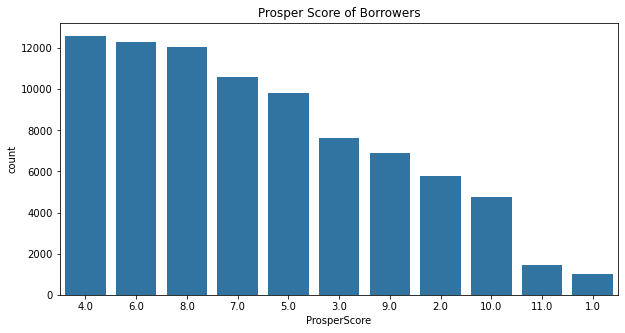

In [20]:
#plt.figure(figsize = [10,5])
#plt.title("Prosper Score for Borrowers")
#sb.countplot(data = df_loan_categorical,x = 'ProsperScore',color = sb.color_palette()[0])
horizontal_bar_chart(df_loan_categorical,
                   'ProsperScore',
                   df_loan_categorical['ProsperScore'].value_counts().index,
                   "Number of Borrowers",
                   "Prosper Score" ,
                   "Prosper Score of Borrowers",
                   [10,5])

> Most Prosper Scores lie in the range between 4 - 8 and there is a very small number of outliers 1 or 11

# How is income ranges distributed ?

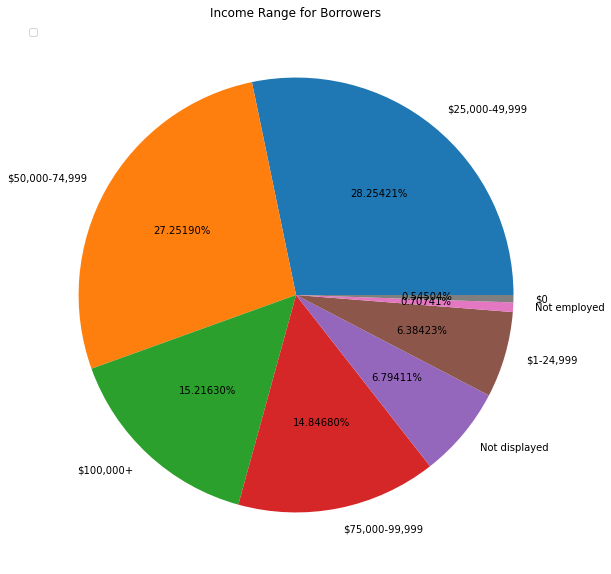

In [21]:
plt.figure(figsize = [20,10])
plt.title("Income Range for Borrowers")
x = df_loan_categorical['IncomeRange'].value_counts().index.tolist()
plt.legend(labels = x,loc = "upper left")
plt.pie(df_loan_categorical['IncomeRange'].value_counts(),labels = x,autopct = '%1.5f%%');

> Income ranges are dominated by 25,000 - 75,000 USD range making about 55%

# What are common reasons for taking a loan ?

**The category of the listing that the borrower selected when posting their listing:**

0 - Not Available,  
1 - Debt Consolidation,  
2 - Home Improvement,  
3 - Business,  
4 - Personal Loan,  
5 - Student Use,  
6 - Auto,  
7- Other,  
8 - Baby&Adoption,  
9 - Boat,  
10 - Cosmetic Procedure,  
11 - Engagement Ring,  
12 - Green Loans,  
13 - Household Expenses,  
14 - Large Purchases,  
15 - Medical/Dental,  
16 - Motorcycle,  
17 - RV,  
18 - Taxes,  
19 - Vacation,  
20 - Wedding Loans

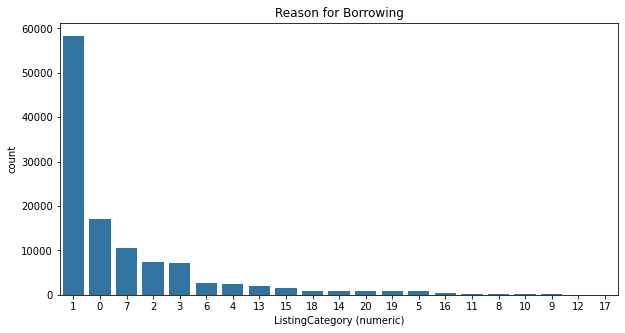

In [22]:
#plt.figure(figsize = [10,5])
#plt.title("Reason For Borrowing")
#sb.countplot(data = df_loan_categorical
#             ,x = "ListingCategory (numeric)"
#             ,color = sb.color_palette()[0]
#             ,order =df_loan_categorical["ListingCategory (numeric)"].value_counts().index )
horizontal_bar_chart(df_loan_categorical,
                  "ListingCategory (numeric)",
                   df_loan_categorical["ListingCategory (numeric)"].value_counts().index,
                   "Reason for Borrowing",
                   "Number of Borrowers",
                   "Reason for Borrowing",
                   [10,5])

> Most common reasons for loans are debt consolidation and house renewal

# How is credit grades distributed ?

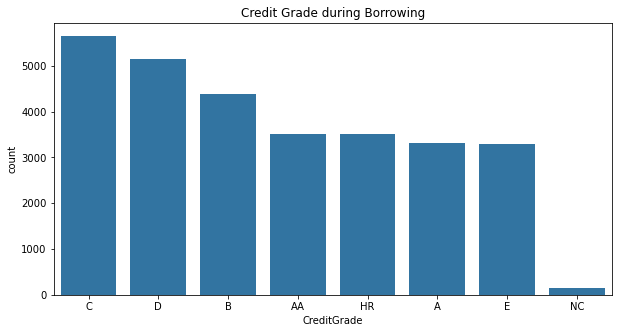

In [23]:
#plt.figure(figsize = [10,5])
#plt.title("")
#sb.countplot(data = df_loan_categorical
#             ,x = "CreditGrade"
#             ,color = sb.color_palette()[0]
#             ,order =df_loan_categorical["CreditGrade"].value_counts().index )
horizontal_bar_chart(df_loan_categorical,
                  "CreditGrade",
                   df_loan_categorical["CreditGrade"].value_counts().index,
                   "Credit  Grade at Borrowing",
                   "Number of Borrowers",
                   "Credit Grade during Borrowing",
                   [10,5])

> Intermediate credit grades are dominant like prosper scores indicating that there is a direct relationship between both

# What is the most likely occupations to take a loan ?

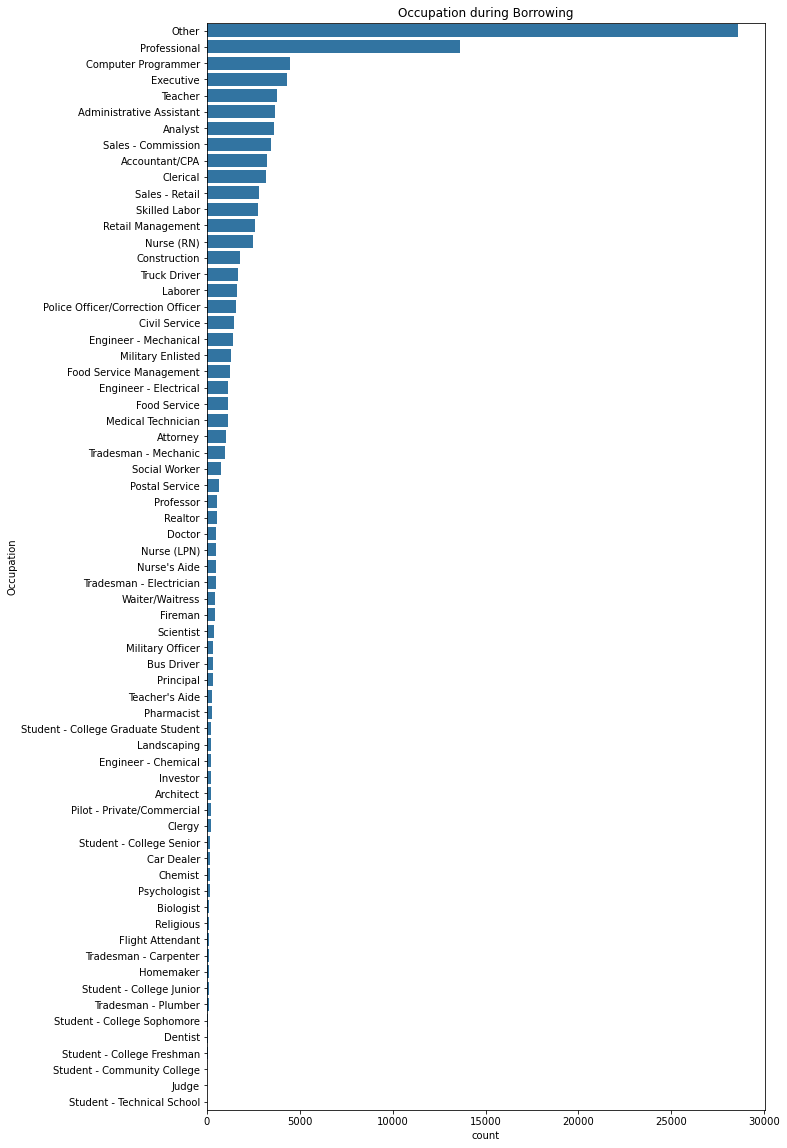

In [24]:
#plt.figure(figsize = [10,20])
#plt.title("Occupations Borrowing")
#sb.countplot(data = df_loan_categorical
#             ,y = "Occupation"
#             ,color = sb.color_palette()[0]
#             ,order =df_loan_categorical["Occupation"].value_counts().index )
vertical_bar_chart(df_loan_categorical,
                  "Occupation",
                   df_loan_categorical["Occupation"].value_counts().index,
                   "Occupation at Borrowing",
                   "Number of Borrowers",
                   "Occupation during Borrowing",
                   [10,20])

> Programmers , Executives and Professionals are the most occupations taking a loan 

# What are the number of income verifiable indviduals ?

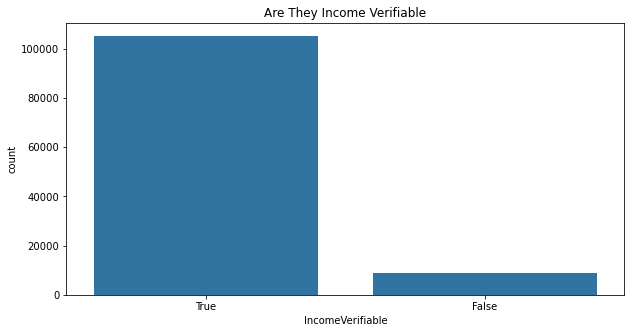

In [25]:
#plt.figure(figsize = [10,5])
#plt.title("Are They Income Verifiable")
#sb.countplot(data = df_loan_categorical
#             ,x = "IncomeVerifiable"
#             ,color = sb.color_palette()[0]
#             ,order =df_loan_categorical["IncomeVerifiable"].value_counts().index )
horizontal_bar_chart(df_loan_categorical,
                  "IncomeVerifiable",
                   df_loan_categorical["IncomeVerifiable"].value_counts().index,
                   "Verifiable",
                   "Number of Borrowers",
                   "Are They Income Verifiable",
                   [10,5])

> Most borrowers are income verified

# Categorical Univariate Exploration

## Loan Status  
> Most Loans are still being payed "Current" and others are already paid in the second order  
> There is very few loans that are past due , indicating regular payment of the loans  

## Are They Income Verifiable ?
> Most Loan Takers can verify their income source and range  

## Occupations
> Top 5 Occupations taking loans excluding others are :  
Professionals  
Computer Programmers  
Executives  
Teachers  
Adminstrative Analysis
## Credit Grades 
> Most Credit Grades Taking Loans are Intermediates "C,D,B"  
While the least Loans are taken by HR "High Risk" indicating that most of them are rejected  

## Reason for Borrowing 
> Most often reasons for borrowing are Debt Consolidation , Home Improvement and Business  
excluding unstated Reasons as others and not available
## Prosper Score 
> Lowest Prosoper Score tend not to get Loans as they are considered High Risk , while reasonable Prosper Scores tend to have higher rate of loans as also indicated by CreditGrade, and high Prosper Scores also tend to get less Loans maybe because they don't need it 
## Income Ranges 
> Highest Income Ranges Taking loans are from 25,000 - 75,000 dollars almost making 55% of the overall

In [26]:
df_loan_non_categorical = df_loan.drop(columns = categorical_columns)
df_loan_non_categorical.head()

,ListingCreationDate,Term,BorrowerAPR,BorrowerRate,EmploymentStatusDuration,DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,Investors
0,2007-08-26 19:09:29.263,36,0.16516,0.1580,2.0,0.17,3083.333333,330.43,0,258
1,2014-02-27 08:28:07.900,36,0.12016,0.0920,44.0,0.18,6125.000000,318.93,0,1
2,2007-01-05 15:00:47.090,36,0.28269,0.2750,NaN,0.06,2083.333333,123.32,0,41
3,2012-10-22 11:02:35.010,36,0.12528,0.0974,113.0,0.15,2875.000000,321.45,0,158
4,2013-09-14 18:38:39.097,36,0.24614,0.2085,44.0,0.26,9583.333333,563.97,0,20


In [27]:
df_loan_non_categorical.describe().T

,count,mean,std,min,25%,50%,75%,max
Term,113937.0,40.830248,10.436212,12.00000,36.000000,36.000000,36.00000,6.000000e+01
BorrowerAPR,113912.0,0.218828,0.080364,0.00653,0.156290,0.209760,0.28381,5.122900e-01
BorrowerRate,113937.0,0.192764,0.074818,0.00000,0.134000,0.184000,0.25000,4.975000e-01
EmploymentStatusDuration,106312.0,96.071582,94.480605,0.00000,26.000000,67.000000,137.00000,7.550000e+02
DebtToIncomeRatio,105383.0,0.275947,0.551759,0.00000,0.140000,0.220000,0.32000,1.001000e+01
StatedMonthlyIncome,113937.0,5608.025568,7478.497275,0.00000,3200.333333,4666.666667,6825.00000,1.750003e+06
MonthlyLoanPayment,113937.0,272.475783,192.697812,0.00000,131.620000,217.740000,371.58000,2.251510e+03
Recommendations,113937.0,0.048027,0.332353,0.00000,0.000000,0.000000,0.00000,3.900000e+01
Investors,113937.0,80.475228,103.239020,1.00000,2.000000,44.000000,115.00000,1.189000e+03


In [28]:
def myhist(dataframe,_x,_bins,_xlabel = "" , _ylabel = "",_title = "",_figsize = [20,12]):
    plt.figure(figsize = _figsize)
    plt.xlabel(_xlabel)
    plt.ylabel(_ylabel)
    plt.title(_title)
    plt.hist(data = dataframe,x = _x,bins = _bins)
    

# How is the monthly income distributed , excluding outliers ?

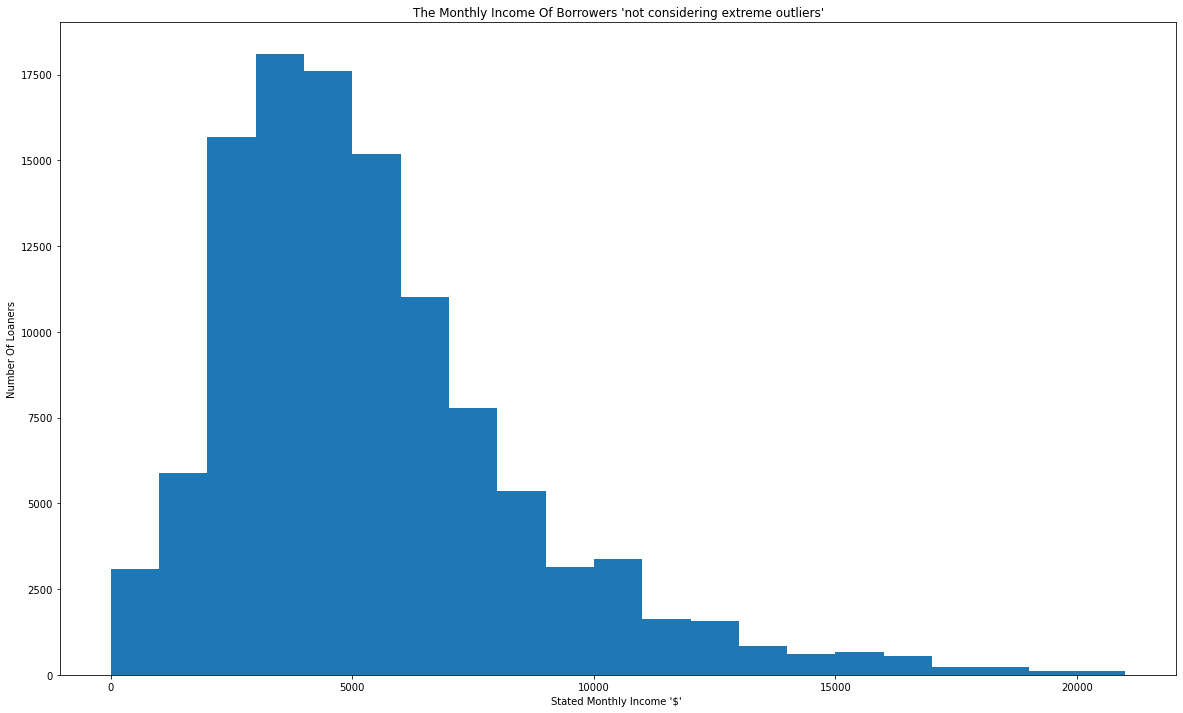

In [29]:
##75% of all loans are taken by people having monthly income less than or equal 6,825$
max_income = 6825*3
#plt.figure(figsize = [20,12])
series_analyzed = df_loan_non_categorical[df_loan_non_categorical["StatedMonthlyIncome"] < max_income]
bin_edges = np.arange(0,series_analyzed["StatedMonthlyIncome"].max() + 1000,1000)
#plt.xlabel("Stated Monthly Income '$' ")
#plt.ylabel("Number Of Loaners")
#plt.title("The Monthly Income Of Borrowers 'not considering extreme outliers'")
#plt.hist(data = series_analyzed,x="StatedMonthlyIncome",bins = bin_edges)
myhist(series_analyzed,
            "StatedMonthlyIncome",
             bin_edges,
            "Stated Monthly Income '$' ",
            "Number Of Loaners",
            "The Monthly Income Of Borrowers 'not considering extreme outliers'",
           [20,12])

> Monthly income is rightly skewed and having a peak of 5000 USD

# Logarthmic Scaled Monthly Income

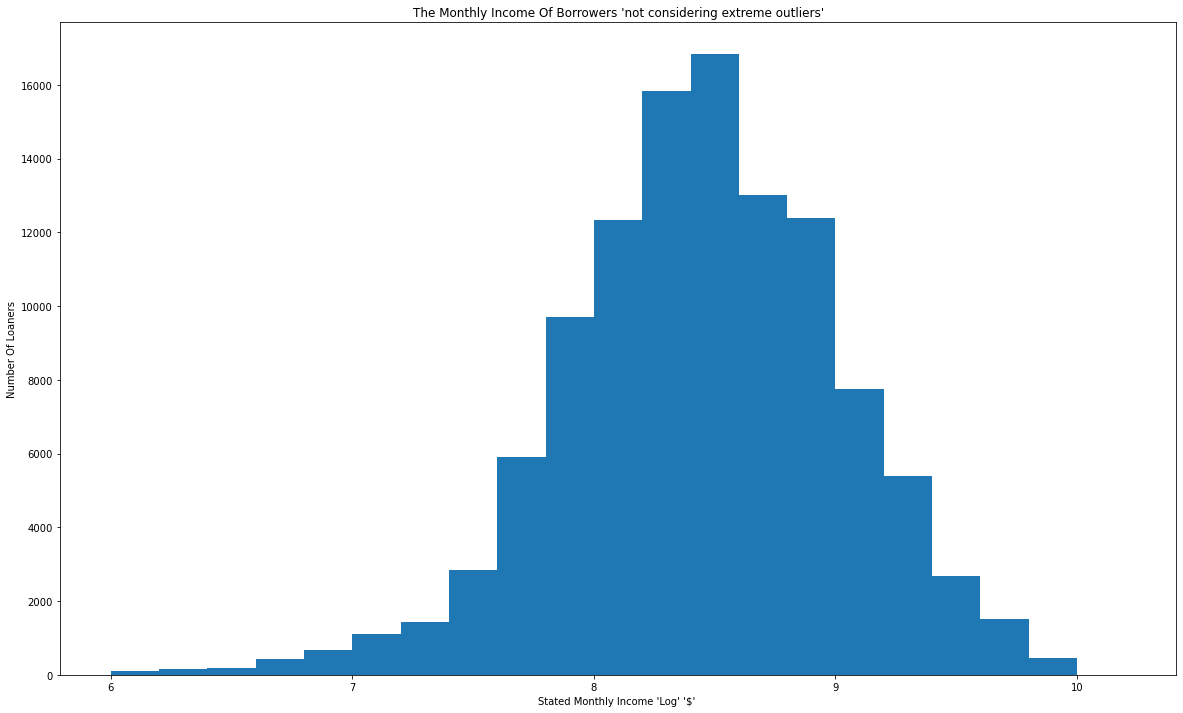

In [30]:
#plt.figure(figsize = [20,12])
series_analyzed["LogMonthlyIncome"] = np.log(series_analyzed["StatedMonthlyIncome"])
bin_edges = np.arange(6,series_analyzed["LogMonthlyIncome"].max()+0.4,0.2)
#plt.xlabel("Stated Monthly Income 'Log' '$' ")
#plt.ylabel("Number Of Loaners")
#plt.title("The Monthly Income Of Borrowers 'not considering extreme outliers'")
#plt.hist(data = series_analyzed,x="LogMonthlyIncome",bins = bin_edges)
myhist(dataframe = series_analyzed ,
      _x = "LogMonthlyIncome",
      _bins = bin_edges,
      _xlabel = "Stated Monthly Income 'Log' '$' ",
      _ylabel = "Number Of Loaners",
      _title = "The Monthly Income Of Borrowers 'not considering extreme outliers'",
      _figsize = [20,12])

> The distribution in the logarthmic scale is near to a normal distribution indicating that the data has low mean and high variance

# What are Term options in Prosper ?

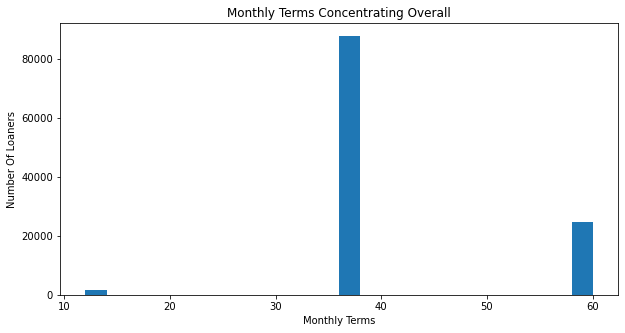

In [31]:
bin_edges  = np.arange(df_loan_non_categorical["Term"].min(),df_loan_non_categorical["Term"].max()+2,2)
#plt.xlabel("Monthly Terms")
#plt.ylabel("Number Of Loaners")
#plt.title("Monthly Terms Concentrating Overall")
#plt.hist(data = df_loan_non_categorical , x= "Term", bins = bin_edges)

myhist(dataframe = df_loan_non_categorical ,
      _x = "Term",
      _bins =bin_edges ,
      _xlabel = "Monthly Terms",
      _ylabel = "Number Of Loaners" ,
      _title = "Monthly Terms Concentrating Overall" ,
      _figsize = [10,5])


> Prosper terms are three categories 12 months , 36 months and 60 months , having the 36 month terms is the most dominant

# Borrower APR , what can be observed ?

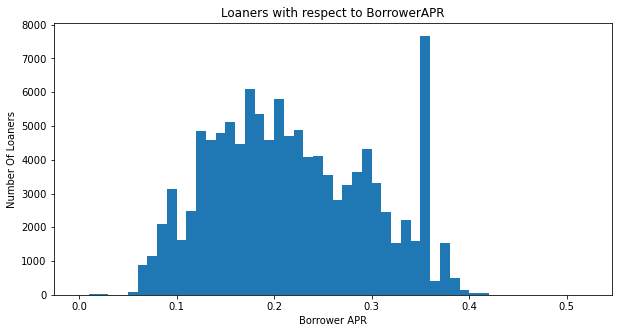

In [32]:
bin_edges = np.arange(0,df_loan_non_categorical["BorrowerAPR"].max()+0.01,0.01)
#plt.hist(data = df_loan_non_categorical , x= "BorrowerAPR", bins = bin_edges)

myhist(dataframe = df_loan_non_categorical,
      _x = "BorrowerAPR",
      _bins =bin_edges ,
      _xlabel = "Borrower APR",
      _ylabel = "Number Of Loaners",
      _title = "Loaners with respect to BorrowerAPR",
      _figsize =[10,5] )

> Borrower APR ranges between about 0.05 to at most 0.45 peaking at 0.18 "moderately" and then spiking at 0.36-0.38

# What can we conclude from Debt To income ratio in moderate cases ?

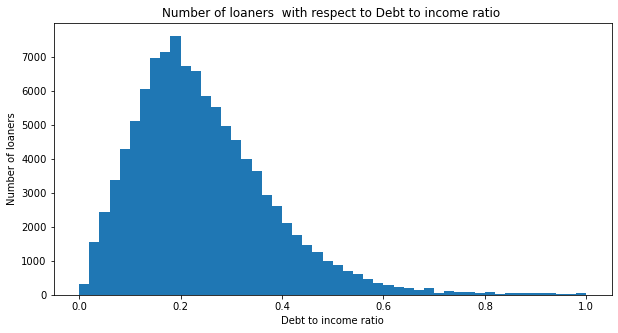

In [33]:
bin_edges = np.arange(0,1.02,0.02)
#plt.hist(data = df_loan_non_categorical , x= "DebtToIncomeRatio", bins = bin_edges)

myhist(dataframe = df_loan_non_categorical ,
      _x = "DebtToIncomeRatio",
      _bins = bin_edges,
      _xlabel = "Debt to income ratio" ,
      _ylabel = "Number of loaners",
      _title = "Number of loaners  with respect to Debt to income ratio ",
      _figsize = [10,5])

> Debt to income ratio is rightly skewed and peaking at 0.2 ,meaning that most borrowers aren't heavily in debt 

# How much is paid monthly for loans taken ?

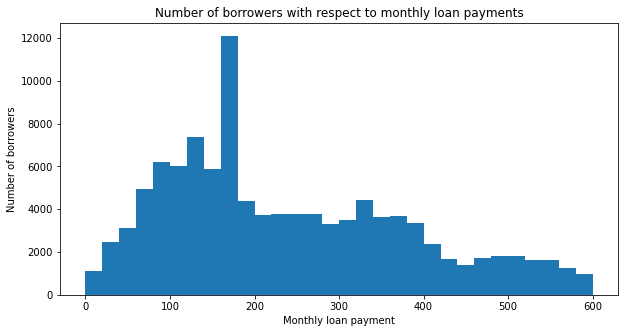

In [34]:
bin_edges = np.arange(0,620,20)
#plt.hist(data = df_loan_non_categorical , x= "MonthlyLoanPayment", bins = bin_edges)

myhist(dataframe = df_loan_non_categorical,
      _x = "MonthlyLoanPayment" ,
      _bins = bin_edges ,
      _xlabel = "Monthly loan payment",
      _ylabel = "Number of borrowers",
      _title = "Number of borrowers with respect to monthly loan payments",
      _figsize = [10,5])

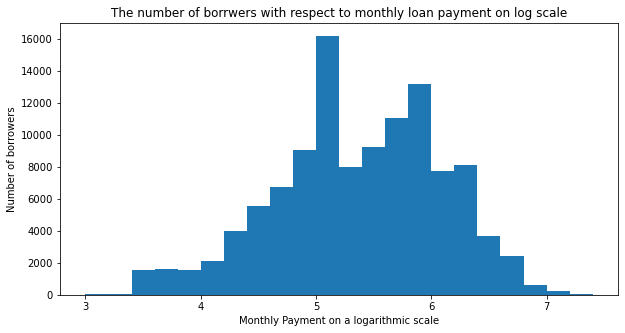

In [35]:
df_loan_non_categorical["LogMonthlyLoanPayment"] = np.log(df_loan_non_categorical["MonthlyLoanPayment"])
bin_edges = np.arange(3,7.6,0.2)
#plt.hist(data = df_loan_non_categorical , x= "LogMonthlyLoanPayment", bins = bin_edges)

myhist(dataframe = df_loan_non_categorical,
      _x = "LogMonthlyLoanPayment",
      _bins = bin_edges,
      _xlabel = "Monthly Payment on a logarithmic scale" ,
      _ylabel = "Number of borrowers",
      _title = "The number of borrwers with respect to monthly loan payment on log scale",
      _figsize = [10,5] )

> Observing the monthly paymets and the log distribution , I concluded that generaly monthly payments are between 200 - 450 USD and is rare above or below this range 

# Employment Duration , what is its properties ?

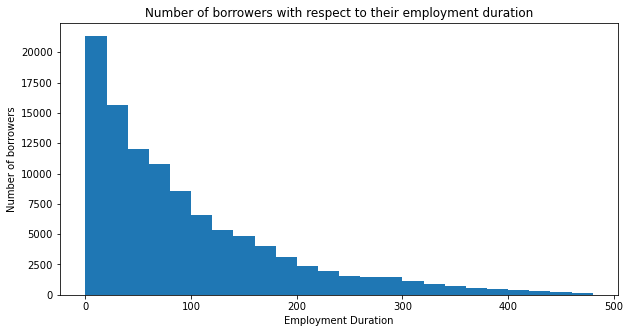

In [36]:
bin_edges = np.arange(0,500,20)
#plt.hist(data = df_loan_non_categorical , x= "EmploymentStatusDuration", bins = bin_edges)

myhist(dataframe = df_loan_non_categorical ,
      _x = "EmploymentStatusDuration",
      _bins = bin_edges,
      _xlabel = "Employment Duration",
      _ylabel = "Number of borrowers",
      _title = "Number of borrowers with respect to their employment duration",
      _figsize = [10,5])

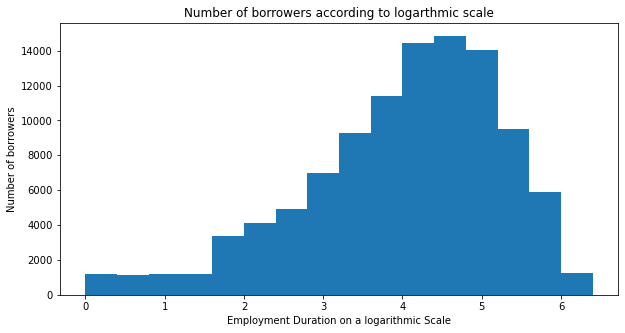

In [37]:
df_loan_non_categorical["LogEmploymentStatusDuration"] = np.log(df_loan_non_categorical["EmploymentStatusDuration"])
bin_edges = np.arange(0,df_loan_non_categorical["LogEmploymentStatusDuration"].max(),0.4)
#plt.hist(data = df_loan_non_categorical , x= "LogEmploymentStatusDuration", bins = bin_edges)

myhist(dataframe = df_loan_non_categorical ,
      _x = "LogEmploymentStatusDuration" ,
      _bins = bin_edges ,
      _xlabel = "Employment Duration on a logarithmic Scale" ,
      _ylabel = "Number of borrowers",
      _title = "Number of borrowers according to logarthmic scale",
      _figsize = [10,5])

> concluded from the graphs that Employment Duration is in a decreasing fashion mostly lying between 0 - 150 months

# Is recommendations a common practice in loan takers ?

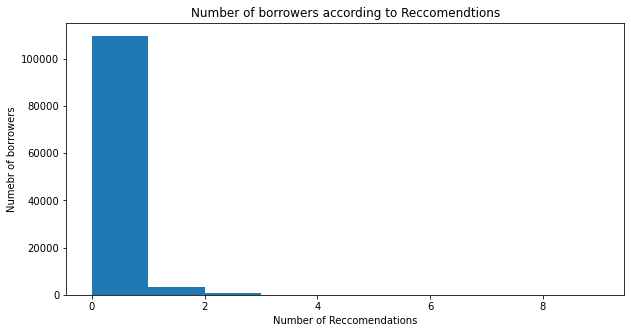

In [38]:
bin_edges = np.arange(0,10,1)
#plt.hist(data = df_loan_non_categorical , x= "Recommendations", bins = bin_edges)

myhist(dataframe = df_loan_non_categorical ,
      _x = "Recommendations",
      _bins = bin_edges,
      _xlabel = "Number of Reccomendations" ,
      _ylabel = "Numebr of borrowers",
      _title = "Number of borrowers according to Reccomendtions",
      _figsize = [10,5])

> most loan takers have 1 or no reccomendations at all

# How many investors participate in each loan ?

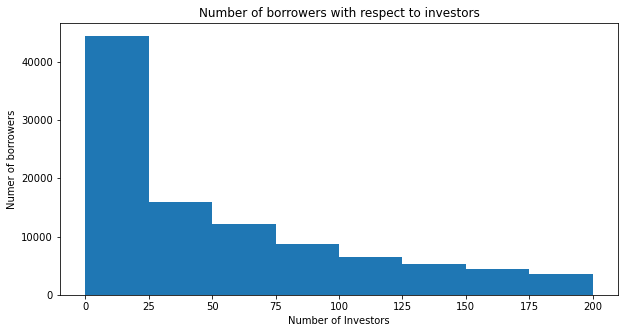

In [39]:
bin_edges = np.arange(0,200+25,25)
#plt.hist(data = df_loan_non_categorical , x= "Investors", bins = bin_edges)

myhist(dataframe = df_loan_non_categorical ,
      _x = "Investors",
      _bins = bin_edges ,
      _xlabel = "Number of Investors" ,
      _ylabel = "Numer of borrowers",
      _title = "Number of borrowers with respect to investors",
      _figsize = [10,5])

> mainly loans have a range between 0 - 25 investors and are decreasing in number as investors increase 

# Non Categorical Univariate Exploration

## Stated Monthly Income 
> The graph is a bit rightly skewed and peaks at the 5000 - 6000 dollars showing that these groups are the most taking loans   
## Terms
> Terms are divided into three parts in the graph , 12 months "1 year" , 36 months "3 years" and 60 months "5 years" , the most dominant one is the three years loan with over than 80,000 borrower   

## BorrowerAPR
> Borrower APR forms a nearly normal distribution but contains three sudden peaks "0.18, 0.3 and 0.36"
## Debt to Income Ratio
> Debt to income ratio is rightly skewed indicating that percents of debt is not very high as the peak of it is 0.2  

## Monthly Loan Payment
>Didn't find a conclusion from the graph except that the most appeared monthly payment is around 200 dollars
## Employment Duration 
> The graph is very right skewed and being the most dominant group in the range of 0 - 100 months employment duration
## Investors
> The number of investors are mostly between 0 and 100 as 75% of the population of borrower have less than 115 investor

# Bivariate Exploration

<AxesSubplot:>

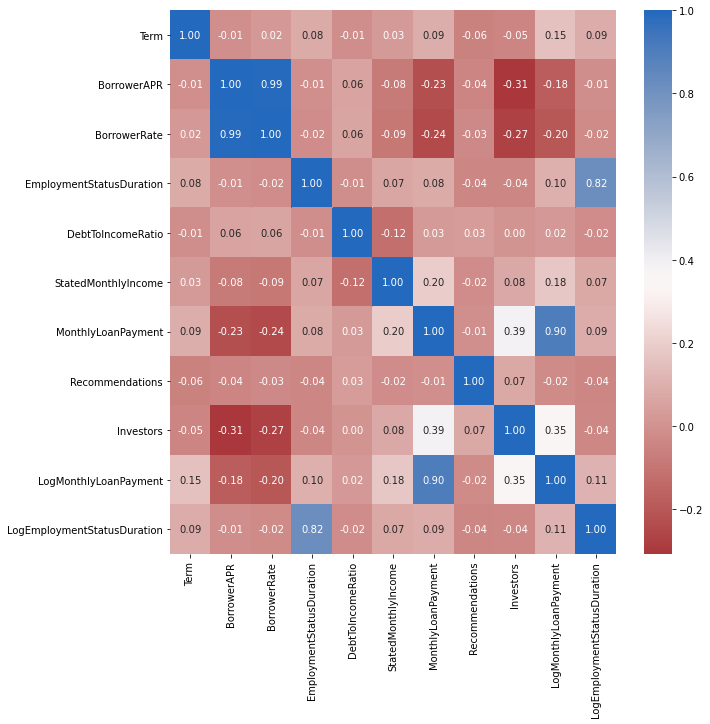

In [40]:
plt.figure(figsize = [10,10])
sb.heatmap(df_loan_non_categorical.corr(), annot = True , fmt = '0.2f',cmap = 'vlag_r')


In [41]:
categorical_variables = ["ListingCategory (numeric)",
                       "CreditGrade",
                       "LoanStatus",
                       "Occupation",
                       "EmploymentStatus",
                       "IncomeRange",
                       "IncomeVerifiable",
                       "ProsperScore"]
numerical_variables = ["Term",
                       "BorrowerAPR",
                       "BorrowerRate",
                       "EmploymentStatusDuration",
                       "DeptToIncomeRatio"
                       "StatedMonthlyIncome",
                       "MonthlyLoanPayment",
                       "Recommendations",
                       "Investors",
                       "LogMonthlyLoan",
                       "LogEmploymentStatusDuration"
                      ]

<Figure size 720x1440 with 0 Axes>

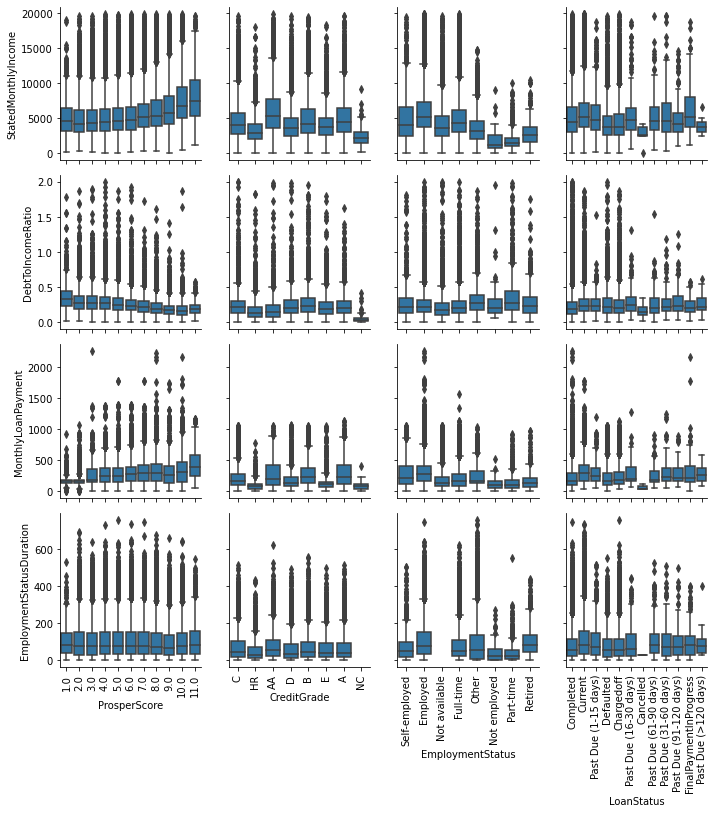

In [42]:
cat_var = ["ProsperScore","CreditGrade","EmploymentStatus","LoanStatus"]

def box_graph(x_axis,y_axis,**kwargs):
    dark_blue = sb.color_palette()[0]
    sb.boxplot(x_axis,y_axis,color = dark_blue)
    plt.xticks(rotation = 90)


plt.figure(figsize = [10,20])
graph = sb.PairGrid(data = df_loan[(df_loan["StatedMonthlyIncome"]<20000) & (df_loan["DebtToIncomeRatio"] < 2)],
                    y_vars = ["StatedMonthlyIncome",
                             "DebtToIncomeRatio",
                             "MonthlyLoanPayment",
                             "EmploymentStatusDuration"]
                   ,x_vars = cat_var)
graph.map(box_graph)

# Bivariate Data Analysis

## Prosper Score - Monthly Income Relationship
> Prosper Score and monthly income are positively correlated as the prosper score seems to increase with the increase in monthly income
## Prosper Score - Debt To Income Ratio Relationship
> Prosper score and debt to income ratio are negatively correlated as higher prosper score have lower debt to income ratio and vice versa
## Credit Grade - Monthly Income Relationship
> HR grade "High risk" has lower than normal monthly income only greater than NC
## Credit Grade - Monthly Loan Payment Relationship
> HR grade has very low monthly payment , probably to ensure their ability to pay it

# Multivariate Analysis

Text(0.5, 1.0, 'Prosper Score - Monthly Income - Employment Status Relationship')

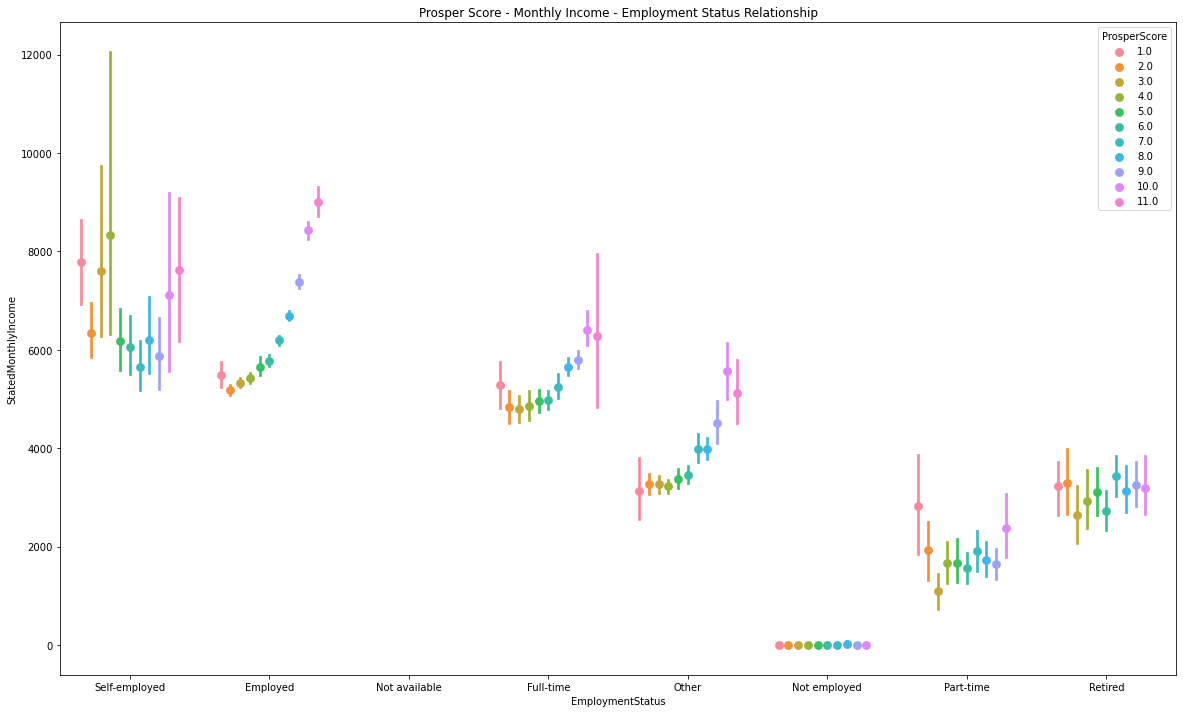

In [43]:
plt.figure(figsize = [20, 12])
sb.pointplot(data = df_loan,
             x = 'EmploymentStatus',
             y = 'StatedMonthlyIncome',
             hue = 'ProsperScore',
             dodge = 0.7,
             linestyles = "")
plt.title('Prosper Score - Monthly Income - Employment Status Relationship')


## Employment Status , Monthly Income , Prosper Score Relationship
> We observe that self employed borrowers even though having high monthly income but most of them have low prosper score "< 6 " indicating that their employment status can be considered risky causing lower scores  
whiel employed and full time borrowers tend to have monthly income around the median and their prosper score is directly proportional with their monthly income  
we also observe that retired and part time borrowers have low monthly income

Text(0.5, 1.0, 'Prosper Score - Income Range - Borrower APR Relationship')

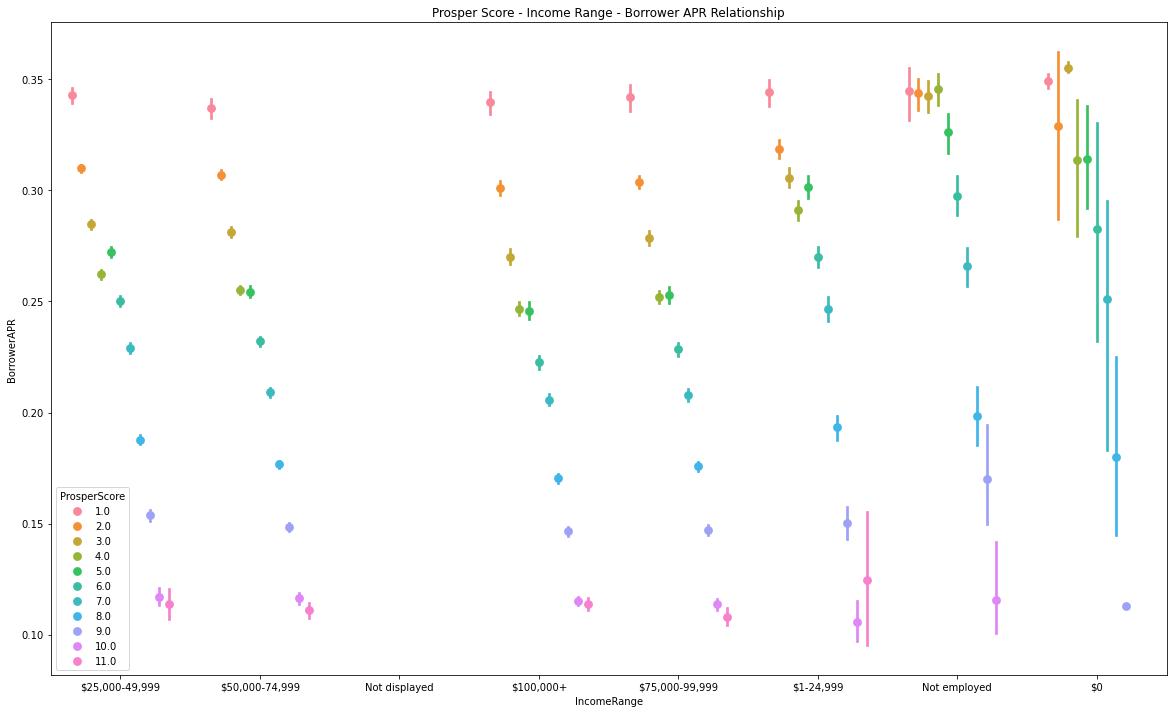

In [44]:
plt.figure(figsize = [20, 12])
sb.pointplot(data = df_loan,
             x = 'IncomeRange',
             y = 'BorrowerAPR',
             hue = 'ProsperScore',
             dodge = 0.7,
             linestyles = "")
plt.title('Prosper Score - Income Range - Borrower APR Relationship')


# Income Range , BorrowerAPR , Prosper Score relationship
> observed from the graph above that the relationship between BorrowerAPR and Prosper Score is inversely proportional

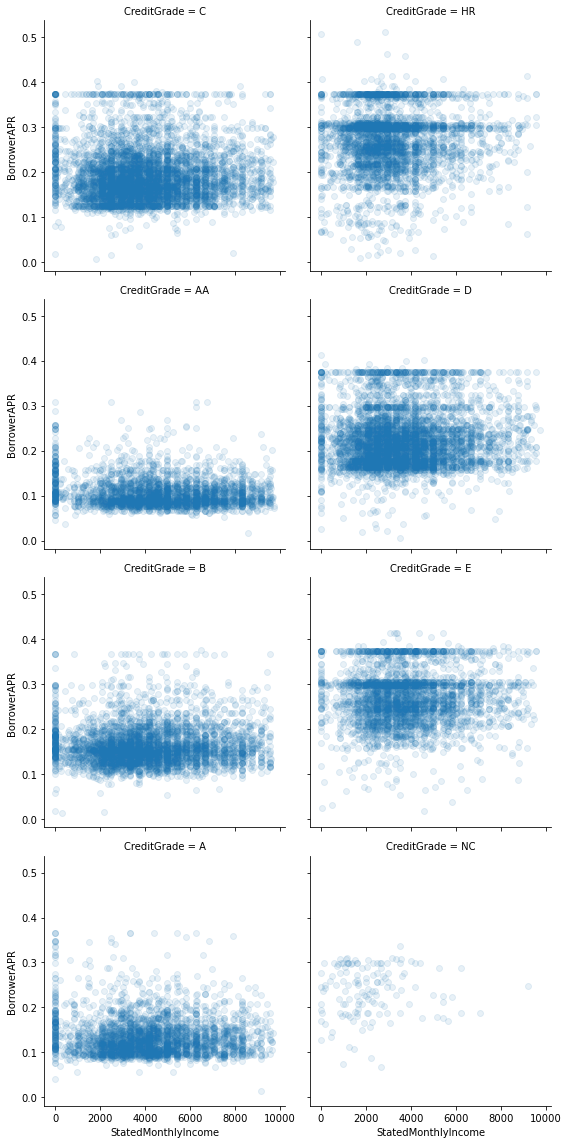

In [45]:
graph = sb.FacetGrid(data = df_loan[df_loan["StatedMonthlyIncome"] < df_loan["StatedMonthlyIncome"].quantile(0.90)],
                     col = 'CreditGrade',
                     col_wrap = 2,
                     size = 4)
graph.map(plt.scatter, 'StatedMonthlyIncome', 'BorrowerAPR', alpha = 0.1)
graph.set_xlabels('StatedMonthlyIncome')
graph.set_ylabels('BorrowerAPR')

# Credit Grade , Monthly income , Borrower APR
> I observed that the as the credit grade decreases the Borrower APR increase , although I thought that higher end monthly income individuals will not be present in the lower classes of Credit Grades , the graphs proved otherwise indicating that monthly income is not related with the credit grade